In [ ]:
!git clone https://github.com/ria-com/nomeroff-net.git

Cloning into 'nomeroff-net'...
remote: Enumerating objects: 242, done.
remote: Counting objects: 100% (242/242), done.
remote: Compressing objects: 100% (97/97), done.
remote: Total 1333 (delta 140), reused 242 (delta 140), pack-reused 1091
Receiving objects: 100% (1333/1333), 57.00 MiB | 42.67 MiB/s, done.
Resolving deltas: 100% (736/736), done.


In [ ]:
!pip install tensorflow-gpu

    100% |████████████████████████████████| 345.2MB 77kB/s 


In [ ]:
ls

banchmarks/  docs/       LICENSE  moderation/   README.md
datasets/    examples/   logs/    NomeroffNet/  requirements.txt
docker/      History.md  models/  public/       train/


In [ ]:
cd ./nomeroff-net

/content/nomeroff-net


In [ ]:
!git clone https://github.com/matterport/Mask_RCNN.git

Cloning into 'Mask_RCNN'...
remote: Enumerating objects: 952, done.
remote: Total 952 (delta 0), reused 0 (delta 0), pack-reused 952
Receiving objects: 100% (952/952), 139.82 MiB | 36.25 MiB/s, done.
Resolving deltas: 100% (541/541), done.


In [ ]:
cd Mask_RCNN

/content/nomeroff-net/Mask_RCNN


In [ ]:
!pip install -r requirements.txt

    100% |████████████████████████████████| 204kB 25.7MB/s 


In [ ]:
cd ../

/content/nomeroff-net


In [ ]:
cd datasets

/content/nomeroff-net/datasets


In [ ]:
mkdir train val

In [ ]:
cd ../

/content/nomeroff-net


In [ ]:
!pip install -r requirements.txt

In [ ]:
ls

banchmarks/  docs/       LICENSE     models/       public/           train/
datasets/    examples/   logs/       moderation/   README.md
docker/      History.md  Mask_RCNN/  NomeroffNet/  requirements.txt


In [ ]:
cd nomeroff-net

/content/nomeroff-net


In [ ]:
cd ../

/content/nomeroff-net


In [ ]:
import os
import cv2
import numpy as np
import sys
import json
import matplotlib.image as mpimg
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

NOMEROFF_NET_DIR = os.path.abspath('.')
sys.path.append(NOMEROFF_NET_DIR)

# specify the path to Mask_RCNN if you placed it outside Nomeroff-net project
MASK_RCNN_DIR = os.path.join(NOMEROFF_NET_DIR, 'Mask_RCNN')
MASK_RCNN_LOG_DIR = os.path.join(NOMEROFF_NET_DIR, "logs")
NUMBER_MODEL_PATH = os.path.join(NOMEROFF_NET_DIR, "models/mask_rcnn_numberplate_0700.h5")

DATASET_NAME = "train"
VERSION = "2019_03"
MASK_RCNN_FROZEN_PATH = os.path.join(NOMEROFF_NET_DIR, "models/", 'vin_{}_{}.pb'.format(DATASET_NAME, VERSION))

In [ ]:
from NomeroffNet import  Detector
from NomeroffNet.Base import convert_keras_to_freeze_pb

CONFIG = {
    "GPU_COUNT": 1,
    "IMAGES_PER_GPU": 1,
    "WEIGHTS": "models/mask_rcnn_numberplate_0700.h5",
    "EPOCHS": 3,
    "CLASS_NAMES": ["BG", "vin_cod"], 
    "NAME": "vin_cod",
    "DATASET_DIR": "datasets",
    "LAYERS": "all",
    "NUM_CLASSES": 2
}

# Initialize npdetector with default configuration file.
nnet = Detector(MASK_RCNN_DIR, MASK_RCNN_LOG_DIR, CONFIG)

In [ ]:
nnet.train()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
CLASS_NAMES                    ['BG', 'vin_cod']
COMPUTE_BACKBONE_SHAPE         None
DATASET_DIR                    datasets
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
EPOCHS                         3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LAYERS                         all
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_los

In [ ]:
MASK_RCNN_FROZEN_PATH='/content/nomeroff-net/logs/vin_cod20190313T0800/mask_rcnn_vin_cod_{epoch:04d}.h5

In [ ]:
import os
import cv2
import numpy as np
import sys
import json

import warnings
warnings.filterwarnings('ignore')

NOMEROFF_NET_DIR = os.path.abspath('.')
sys.path.append(NOMEROFF_NET_DIR)

# specify the path to Mask_RCNN if you placed it outside Nomeroff-net project
MASK_RCNN_DIR = os.path.join(NOMEROFF_NET_DIR, 'Mask_RCNN')
MASK_RCNN_LOG_DIR = os.path.join(NOMEROFF_NET_DIR, "logs")

DATASET_NAME = "train"
VERSION = "2019"
MASK_RCNN_MODEL_PATH = os.path.join(NOMEROFF_NET_DIR, "models/mask_rcnn_numberplate_0700.h5")

# Import license plate recognition tools.
from NomeroffNet import  Detector
from NomeroffNet.Base import convert_keras_to_freeze_pb


CONFIG = {
    "GPU_COUNT": 1,
    "IMAGES_PER_GPU": 1,
    "WEIGHTS": "models/mask_rcnn_numberplate_0700.h5",
    "EPOCHS": 50,
    "CLASS_NAMES": ["BG","vin_cod"],
    "NAME": "vin_cod",
    "DATASET_DIR": "datasets",
    "LAYERS": "all",
    "NUM_CLASSES": 2
    
}

# Initialize npdetector with default configuration file.
nnet = Detector(MASK_RCNN_DIR, MASK_RCNN_LOG_DIR, CONFIG)

nnet.train()
#nnet.loadModel(MASK_RCNN_MODEL_PATH)
#nnet.train()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
CLASS_NAMES                    ['BG', 'vin_cod']
COMPUTE_BACKBONE_SHAPE         None
DATASET_DIR                    datasets
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
EPOCHS                         20
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LAYERS                         all
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_lo

In [ ]:
nnet

In [ ]:

MASK_RCNN_FROZEN_PATH ='models/mask_rcnn_vin_cod_0003.h5'

In [ ]:
import keras
keras.backend.clear_session()
nnet.loadModel("models/mask_rcnn_numberplate_0700.h5")
model = nnet.getKerasModel()
convert_keras_to_freeze_pb(model,MASK_RCNN_FROZEN_PATH)

OUTPUT: mrcnn_detection/Reshape_1,mrcnn_class/Reshape_1,mrcnn_bbox/Reshape,mrcnn_mask/Reshape_1,ROI/packed_2,rpn_class/concat,rpn_bbox/concat
INPUT: input_image,input_image_meta,input_anchors
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_image (InputLayer)        (None, None, None, 3 0                                            
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, None, None, 3 0           input_image[0][0]                
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, None, None, 6 9472        zero_padding2d_1[0][0]           
__________________________________________________________________________________________________
bn_conv1 (BatchN

NotFoundError: ignored

In [ ]:
nnet.

In [ ]:
from NomeroffNet import Detector, filters

In [ ]:
nnet = Detector(MASK_RCNN_DIR, MASK_RCNN_LOG_DIR)

In [ ]:
nnet.loadModel(MASK_RCNN_FROZEN_PATH)

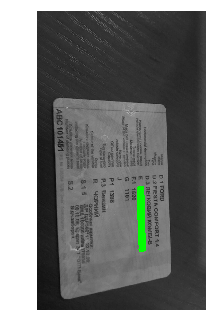

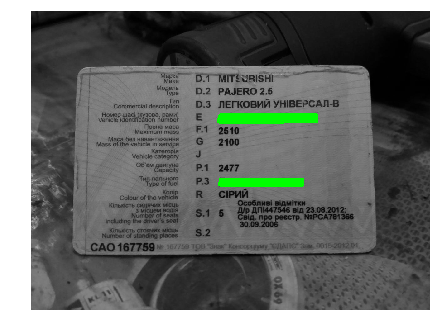

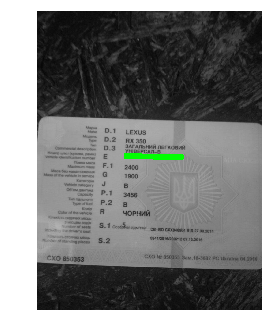

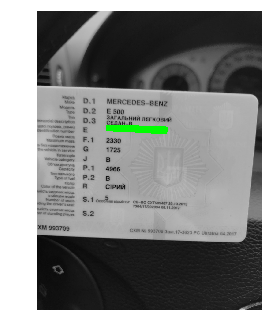

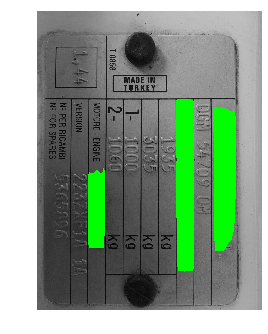

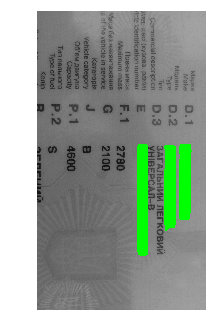

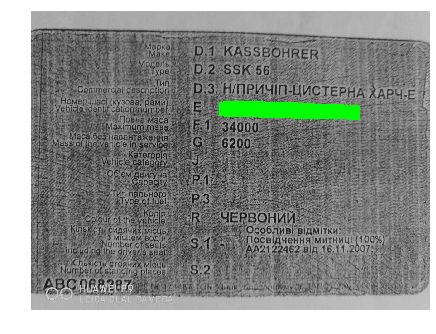

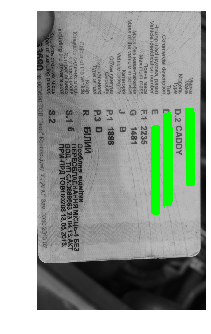

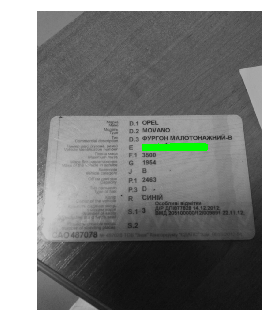

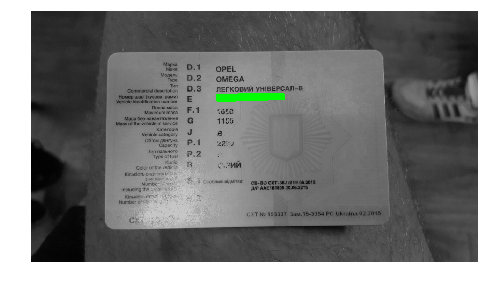

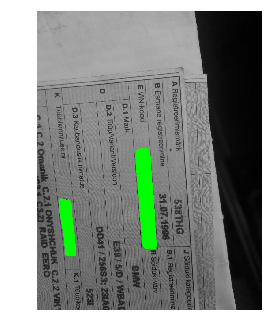

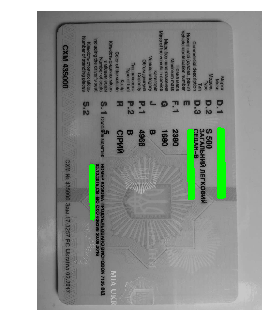

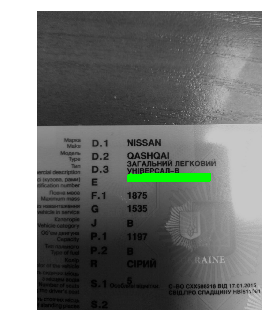

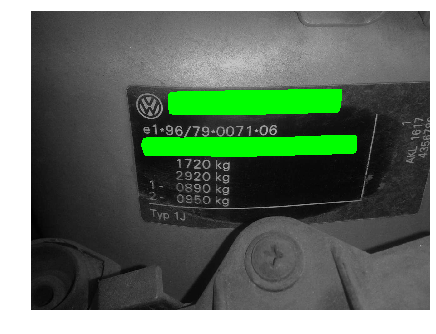

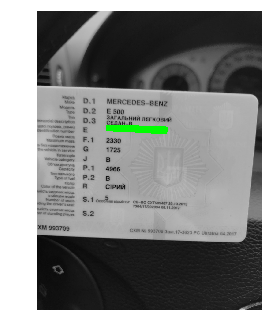

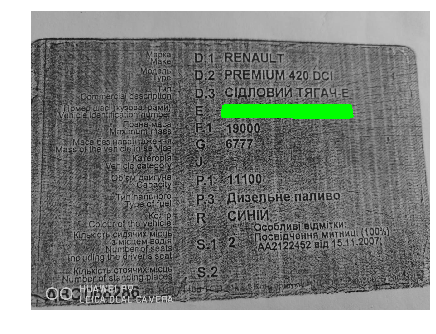

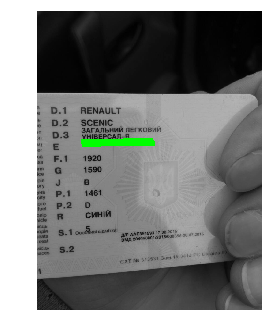

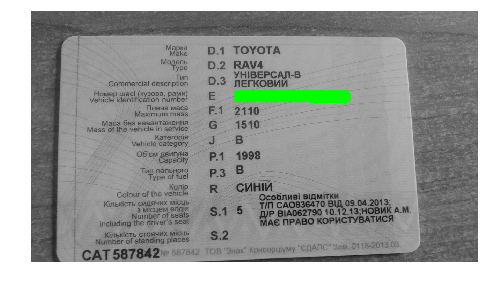

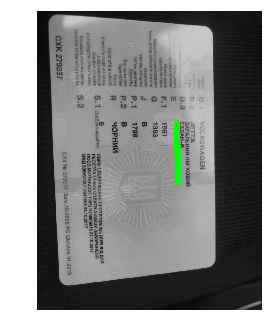

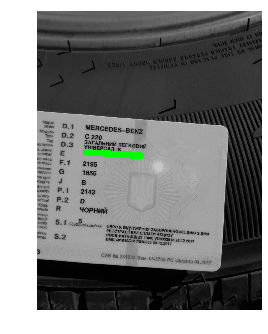

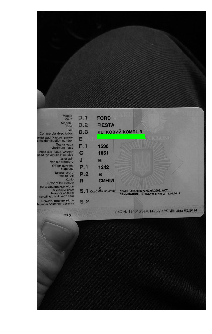

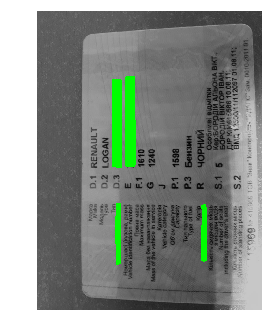

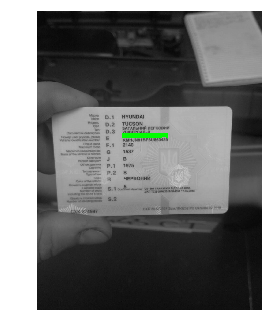

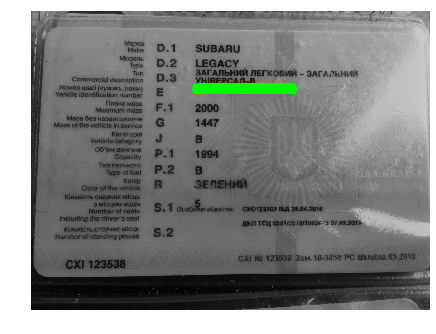

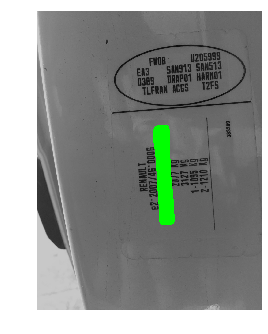

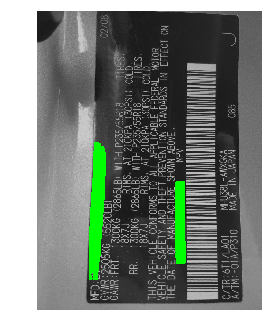

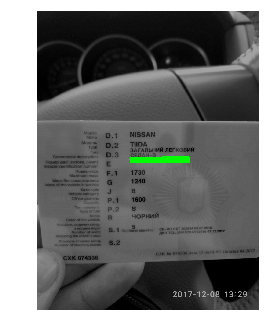

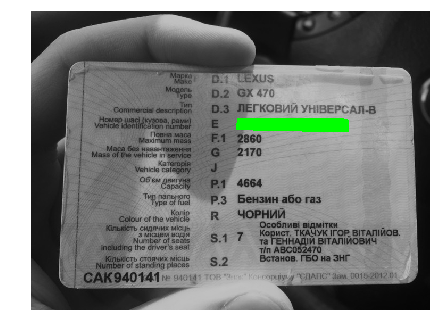

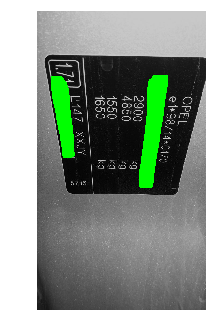

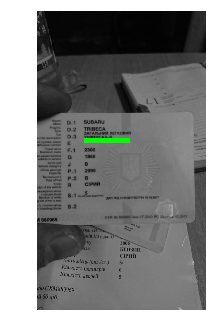

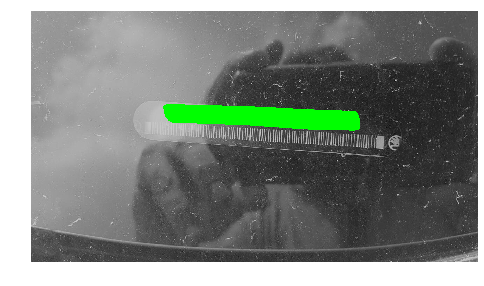

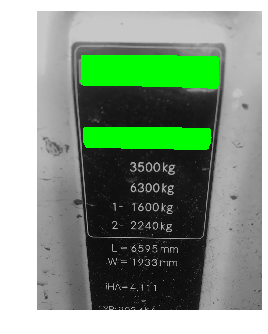

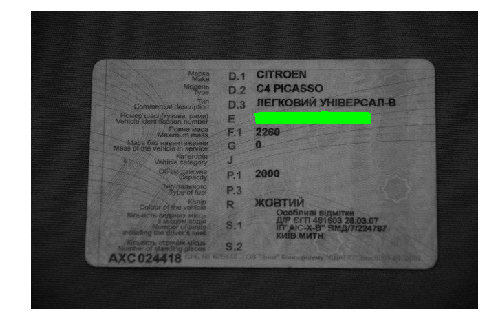

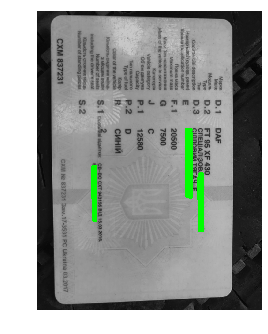

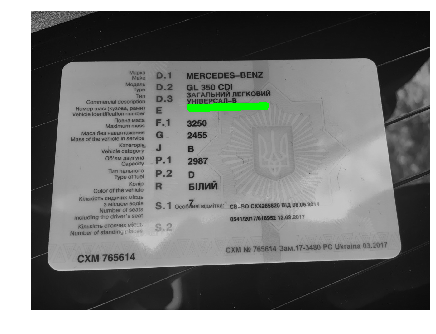

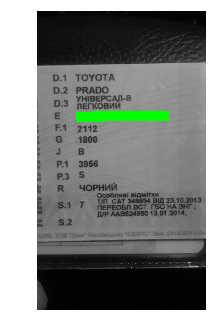

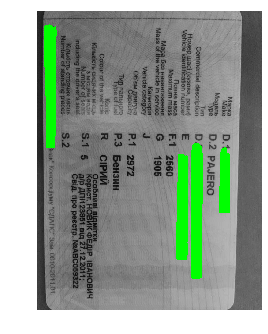

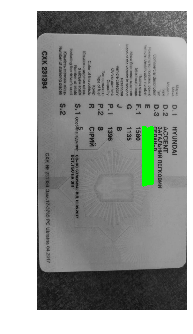

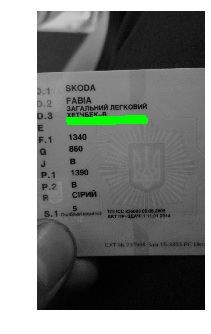

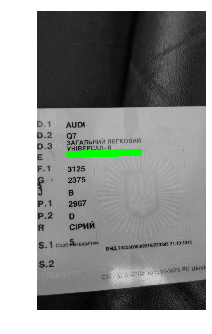

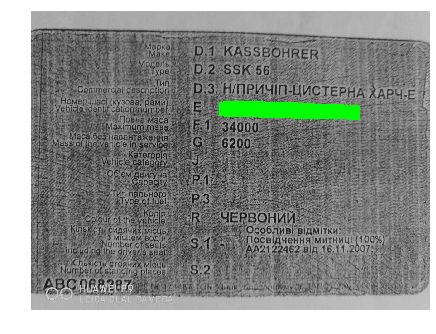

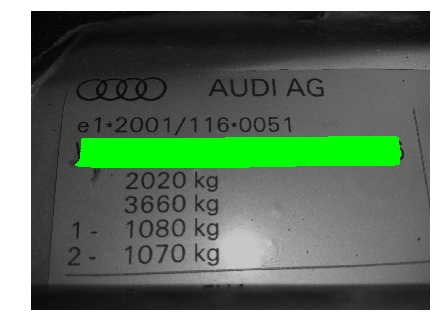

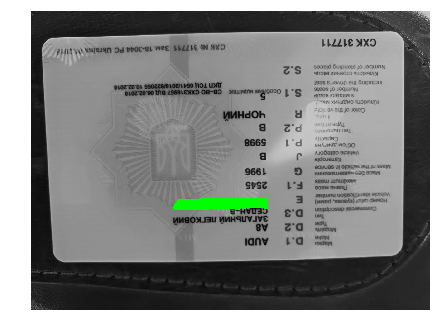

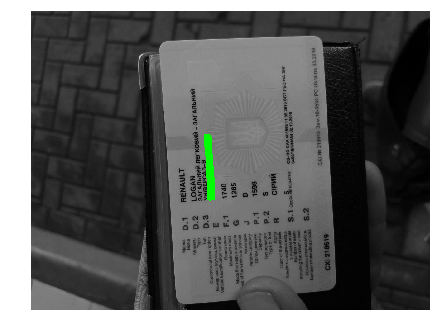

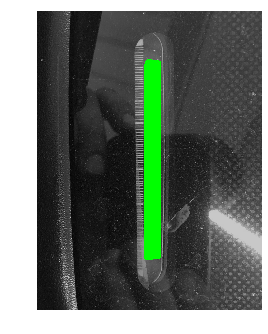

OSError: ignored

In [45]:
rootDir = 'datasets/val'

for dirName, subdirList, fileList in os.walk(rootDir):
    for fname in fileList:
        img_path = os.path.join(dirName, fname)
        img = mpimg.imread(img_path)
        
        np = nnet.detect([img])
    
        # Generate splashs.
        splashs = filters.color_splash(img, np)
        for splash in splashs:
            plt.imshow(splash)
            plt.axis("off")
            plt.show()

In [ ]:

model.load_weights(nnet)

NameError: ignored

In [ ]:
tf.__version__

NameError: ignored

In [ ]:
nnet

NameError: ignored

In [ ]:
mod.save('vin_model_1.h5')

AttributeError: ignored

In [ ]:
import os
import cv2
import numpy as np
import sys
import json

import warnings
warnings.filterwarnings('ignore')

NOMEROFF_NET_DIR = os.path.abspath('.')
sys.path.append(NOMEROFF_NET_DIR)

# specify the path to Mask_RCNN if you placed it outside Nomeroff-net project
MASK_RCNN_DIR = os.path.join(NOMEROFF_NET_DIR, 'Mask_RCNN')
MASK_RCNN_LOG_DIR = os.path.join(NOMEROFF_NET_DIR, "logs")

DATASET_NAME = "train"
VERSION = "2019"
MASK_RCNN_MODEL_PATH = os.path.join(NOMEROFF_NET_DIR, "models/mask_rcnn_numberplate_0700.h5")

# Import license plate recognition tools.
from NomeroffNet import  Detector
#from NomeroffNet.Base import convert_keras_to_freeze_pb

CONFIG = {
    "GPU_COUNT": 1,
    "IMAGES_PER_GPU": 1,
    "WEIGHTS": "models/mask_rcnn_numberplate_0700.h5",
    "EPOCHS": 100,
    "CLASS_NAMES": ["vin_cod"],
    "NAME": "vin_cod",
    "DATASET_DIR": "datasets",
    "LAYERS": "all",
    "NUM_CLASSES": 2
    
}

In [ ]:
nnet = Detector(MASK_RCNN_MODEL_PATH, MASK_RCNN_LOG_DIR, CONFIG)

nnet.train()